# Project-Assignment-1 : Rice Classification

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from tabulate import tabulate

## PART I: Textual Data Analysis

Get data and split it for train and test.

In [14]:
# Load data from CSV file
df = pd.read_csv('part_i.csv')

# Assuming the last column is the target variable and the rest are features
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


##### k-Nearest Neighbor(kNN)

- **Concept**: KNN works by finding the 'k' closest data points (neighbors) to a new data point and making predictions based on the majority class (for classification) or the average value (for regression) of these neighbors.

- **How it works**:
    1. Choose the number of neighbors 'k'.
    2. Calculate the distance between the new data point and all other data points in the dataset.
    3. Identify the 'k' closest neighbors.
    4. For classification, assign the most common class among the neighbors to the new data point. For regression, assign the average value of the neighbors to the new data point.

- **Advantages**: Simple to understand and implement, no training phase required.
- **Disadvantages**: Can be computationally expensive for large datasets, sensitive to the choice of 'k' and the distance metric, and can be affected by irrelevant features.

KNN is often used as a baseline model due to its simplicity and effectiveness for certain types of problems.

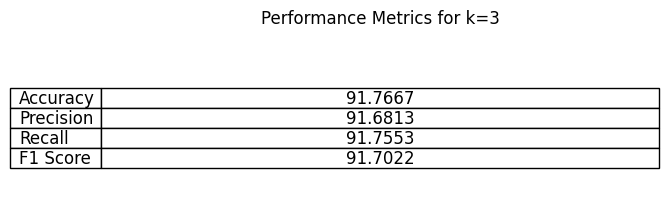

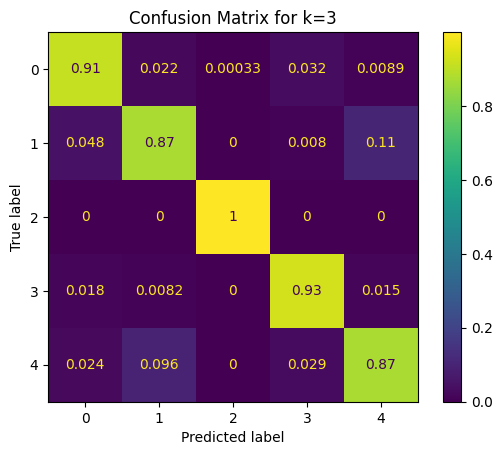

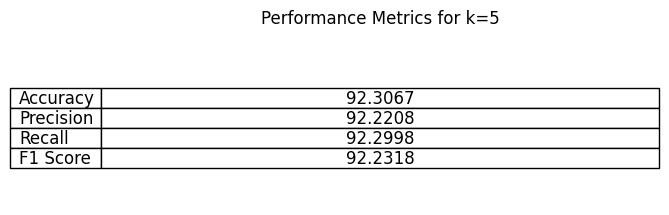

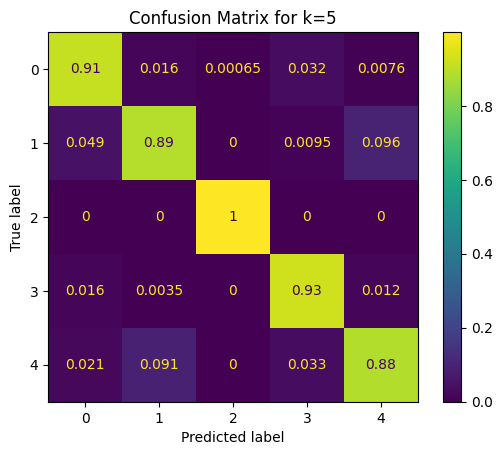

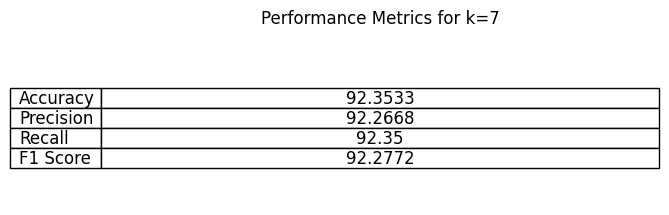

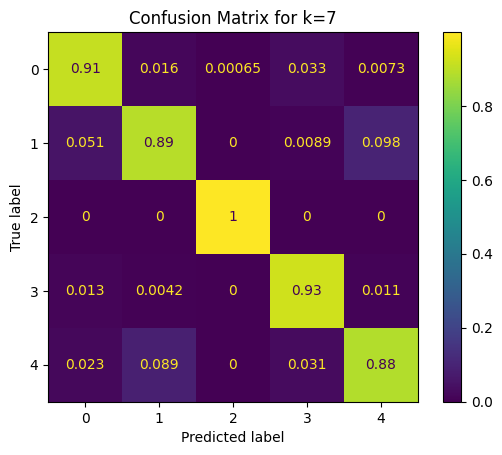

In [21]:
def knn_classifier(k):
    # Create a pipeline with an imputer and the kNN classifier
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    # Train the classifier
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred, normalize=True)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1_score_value = f1_score(y_test, y_pred, average='macro')

    # Create a table with metrics
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [round(accuracy * 100, 4), round(precision * 100, 4), round(recall * 100, 4), round(f1_score_value * 100, 4)]
    fig, ax = plt.subplots(figsize=(6, 2))  # Adjust the figsize to fit the table and title
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=[[v] for v in values], rowLabels=metrics, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    plt.title(f'Performance Metrics for k={k}', pad=20)
    plt.show()
    
    # Confusion matrix
    matrix = confusion_matrix(y_test, y_pred, normalize="pred")
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    # Plot it with title
    disp.plot()
    plt.title(f'Confusion Matrix for k={k}')
    # Show it
    plt.show()

# Test the classifier with k=3
knn_classifier(3)

# Test the classifier with k=5
knn_classifier(5)

# Test the classifier with k=7
knn_classifier(7)